In [104]:
import numpy as np 
import pandas as pd
from xml.etree import ElementTree as ET
from PIL import Image
import cv2
import os
import xml.dom.minidom
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import struct

import matplotlib.pyplot as plt

In [105]:
#seperating xml file from bmp image and storing them in new folder.
img_src = 'Marmot_data'
xml_src = 'Marmot_data'
des1 = 'dataset/image'
des2 = 'dataset/annote'

if os.path.isdir(img_src) and os.path.isdir(xml_src):
    data_files = os.listdir(img_src)
    for file in data_files:
        if (file.endswith("bmp")):
            shutil.copy(img_src+'/'+file,des1)

    data_files = os.listdir(xml_src)
    for file in data_files:
        if (file.endswith("xml")):
            shutil.copy(xml_src+'/'+file,des2)

In [106]:
data_files1 = os.listdir('dataset/Images')
data_files2 = os.listdir('dataset/Annotations')
data_files3 = os.listdir('dataset/image')
data_files4 = os.listdir('dataset/annote')
print(f'Total images from ICDAR 2017 table dataset is {len(data_files1)}')
print("-"*50)
print(f'Total Annotations from ICDAR 2017 table dataset is {len(data_files2)}')
print("-"*50)
print(f'Total images from marmot dataset is {len(data_files3)}')
print("-"*50)
print(f'Total Annotations from marmot dataset is {len(data_files4)}')

Total images from ICDAR 2017 table dataset is 1600
--------------------------------------------------
Total Annotations from ICDAR 2017 table dataset is 1600
--------------------------------------------------
Total images from marmot dataset is 509
--------------------------------------------------
Total Annotations from marmot dataset is 495


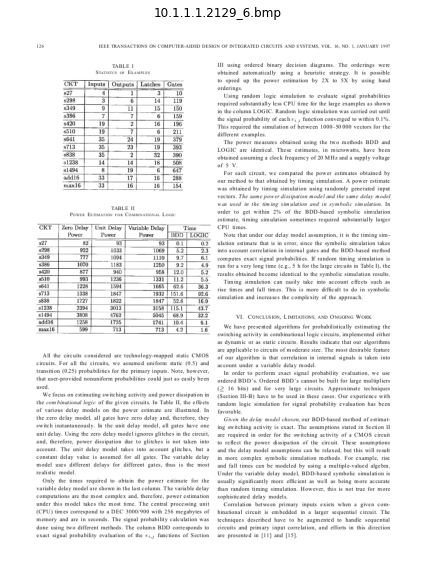

In [108]:
#showing random image file from marmot dataset
img_filepath = 'dataset/image/10.1.1.1.2129_6.bmp'
img = cv2.imread(img_filepath, cv2.IMREAD_UNCHANGED)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('10.1.1.1.2129_6.bmp')
plt.imshow(img)
plt.show()

In [109]:
#showing corresponding Annotation of image.
with open('dataset/annote/10.1.1.1.2129_6.xml') as xml_file:
    xml_file = xml.dom.minidom.parseString(xml_file.read()) 
    xml_file = xml_file.toprettyxml()
print (xml_file)

<?xml version="1.0" ?>
<annotation>
	
	
	<folder>MARMOT_ANNOTATION</folder>
	
	
	<filename>10.1.1.1.2129_6.bmp</filename>
	
	
	<path>/home/shubham/Desktop/MARMOT_ANNOTATION/10.1.1.1.2129_6.bmp</path>
	
	
	<source>
		
		
		<database>Unknown</database>
		
	
	</source>
	
	
	<size>
		
		
		<width>816</width>
		
		
		<height>1056</height>
		
		
		<depth>1</depth>
		
	
	</size>
	
	
	<segmented>0</segmented>
	
	
	<object>
		
		
		<name>column</name>
		
		
		<pose>Unspecified</pose>
		
		
		<truncated>0</truncated>
		
		
		<difficult>0</difficult>
		
		
		<bndbox>
			
			
			<xmin>108</xmin>
			
			
			<ymin>109</ymin>
			
			
			<xmax>143</xmax>
			
			
			<ymax>322</ymax>
			
		
		</bndbox>
		
	
	</object>
	
	
	<object>
		
		
		<name>column</name>
		
		
		<pose>Unspecified</pose>
		
		
		<truncated>0</truncated>
		
		
		<difficult>0</difficult>
		
		
		<bndbox>
			
			
			<xmin>160</xmin>
			
			
			<ymin>109</ymin>
			
			
			<xmax>190</xmax>
			
			
			<ymax>321</ymax>
			
		
		</bndbox>
	

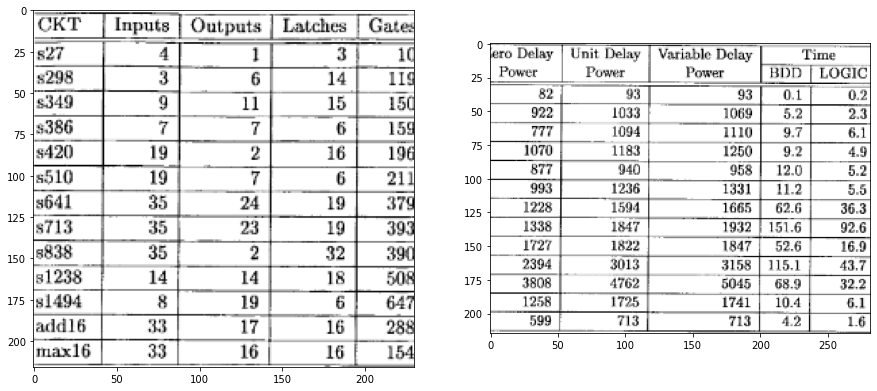

In [112]:
##manually substituting the co-ordinates to crop the image to get the table structure from it.

img=Image.open('dataset/image/10.1.1.1.2129_6.bmp')

xmin = [108,160,204,259,313,359,319,238,173,111,56]
ymin = [109,109,112,111,112,407,406,390,389,391,389]
xmax = [143,190,246,297,338,393,343,304,224,157,92]
ymax = [322,321,322,322,325,601,604,601,602,604,603]

l1 , l2 = list(),list()
a = 0
for j , i  in enumerate(ymin):
  if a == 0:
    a = i
    l2.append(j)
  elif a > 0 and j + 1 < len(ymin):
    if  abs(a-i) <= 50:
      a = i 
      l2.append(j)
    else:
      a = i
      l1.append(l2)
      l2 = []
      l2.append(j)
  else:
    l1.append(l2)

plt.figure(figsize=(15, 15))
for k in range(len(l1)):
  plt.subplot(1, len(l1), k+1)
  x_min = min(xmin[l1[k][0]:l1[k][len(l1[k])-1]+1])
  y_min = min(ymin[l1[k][0]:l1[k][len(l1[k])-1]+1])
  x_max = max(xmax[l1[k][0]:l1[k][len(l1[k])-1]+1])
  y_max = max(ymax[l1[k][0]:l1[k][len(l1[k])-1]+1])

  crop_rectangle = (int(x_min),int(y_min),int(x_max),int(y_max))
  cropped_im = img.crop(crop_rectangle)
  imgplot = plt.imshow(cropped_im)
  
  x_min , y_min , x_max , y_max = list() , list() , list() , list()

In [113]:
##Getting size of images
dir_path = 'dataset/image'
list_of_heights = []
list_of_widths = []
for file in os.listdir(dir_path):
  img = Image.open(dir_path + '/' + file)
  # get dimensions of image
  shape = img.size
  list_of_heights.append(shape[0])
  list_of_widths.append(shape[1]) 

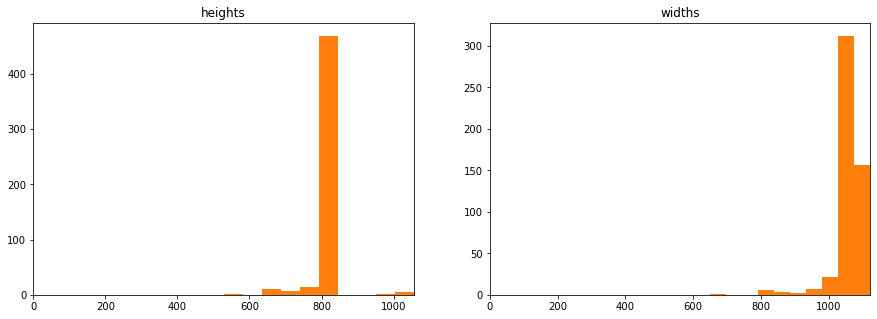

In [114]:
plt.figure(figsize=(15,5))
for i in range(2): 
  plt.subplot(1, 2, i+1)
  if i == 0:
    plt.hist(list_of_heights,bins=20)
    plt.hist(list_of_heights)
    plt.title('heights')
    plt.xlim(0,max(list(set(list_of_heights))))
  else :
    plt.hist(list_of_widths,bins=20)
    plt.hist(list_of_widths)
    plt.title('widths')
    plt.xlim(0,max(list(set(list_of_widths))))

In [115]:
#referance :- https://www.geeksforgeeks.org/xml-parsing-python/
dir_path = 'dataset/annote'

xmin_ , ymin_ , xmax_ , ymax_ = list(), list(), list() , list()

filename_ , table_width_, table_height_= list(), list(), list() 

for file in os.listdir(dir_path):
  if file.endswith('.xml'):
    tree = ET.parse(dir_path + '/' + file) 
    root = tree.getroot()
    name=root.find("./filename").text
    width=root.find("./size/width").text
    height=root.find("./size/height").text

    xmin , ymin , xmax , ymax = list(), list(), list() , list()


    for x_min in root.findall("./object/bndbox/xmin"):
      xmin.append(x_min.text)
    
    for y_min in root.findall("./object/bndbox/ymin"):
      ymin.append(y_min.text)
    
    for x_max in root.findall("./object/bndbox/xmax"):
      xmax.append(x_max.text)
    
    for y_max in root.findall("./object/bndbox/ymax"):
      ymax.append(y_max.text)

    filename , table_width, table_height = list(), list(), list() 

    for i in range(0,len(xmax)):
      filename.append(name)
      table_width.append(width)
      table_height.append(height)

    for i in range(0,len(xmax)):
      filename_.append(filename[i])
      table_width_.append(table_width[i])
      table_height_.append(table_height[i])

      xmin_.append(xmin[i])
      ymin_.append(ymin[i])
      xmax_.append(xmax[i])
      ymax_.append(ymax[i])


Dict = dict({'filename': filename_, 'table_width': table_width_, 'table_height':table_height_,
           'xmin':xmin_,'ymin':ymin_,'xmax':xmax_,'ymax':ymax_})


df_marmot=pd.DataFrame.from_dict(Dict)
df_marmot.to_pickle('df_marmot.pkl')

In [116]:
df_marmot.head()

,filename,table_width,table_height,xmin,ymin,xmax,ymax
0,10.1.1.1.2006_3.bmp,793,1123,458,710,517,785
1,10.1.1.1.2006_3.bmp,793,1123,531,710,568,783
2,10.1.1.1.2006_3.bmp,793,1123,583,712,619,785
3,10.1.1.1.2006_3.bmp,793,1123,637,712,670,784
4,10.1.1.1.2013_63.bmp,816,1056,118,191,288,766


In [125]:
##creating table and column mask from marmot dataframe
for m in df_marmot['filename'].unique():
    
    width=int(df_marmot[df_marmot['filename']==m]['table_width'].unique())
    height=int(df_marmot[df_marmot['filename']==m]['table_height'].unique())

    xmin=df_marmot[df_marmot['filename']==m]['xmin'].to_list()
    ymin=df_marmot[df_marmot['filename']==m]['ymin'].to_list()
    xmax=df_marmot[df_marmot['filename']==m]['xmax'].to_list()
    ymax=df_marmot[df_marmot['filename']==m]['ymax'].to_list()


    column_mask = np.zeros((height, width), dtype=np.int32)
    table_mask = np.zeros((height, width), dtype=np.int32)

        
    for k in range(0,len(xmin)):
        xmin[k]=int(xmin[k])
        xmax[k]=int(xmax[k])
        ymin[k]=int(ymin[k])
        ymax[k]=int(ymax[k])

    l1 , l2 = list(),list()
    a = 0
    for j , i  in enumerate(ymin):
      if a == 0:
        a = i
        l2.append(j)
      elif a > 0 and j + 1 < len(ymin):
        if  abs(a-i) <= 50:
          a = i 
          l2.append(j)
        else:
          a = i
          l1.append(l2)
          l2 = []
          l2.append(j)
      else:
        a = i
        l2.append(j)
        l1.append(l2) 

    for k in range(len(l1)):
      x_min = xmin[l1[k][0]:l1[k][len(l1[k])-1]+1]
      y_min = ymin[l1[k][0]:l1[k][len(l1[k])-1]+1]
      x_max = xmax[l1[k][0]:l1[k][len(l1[k])-1]+1]
      y_max = ymax[l1[k][0]:l1[k][len(l1[k])-1]+1]
    
      table_xmin_cordinate=int(min(x_min))
      table_ymin_cordinate=int(min(y_min))
      table_xmax_cordinate=int(max(x_max))
      table_ymax_cordinate=int(max(y_max))
    
      table_mask[table_ymin_cordinate:table_ymax_cordinate, table_xmin_cordinate:table_xmax_cordinate] = 255
    
    for j in range(0,len(xmin)):
        column_mask[int(ymin[j]):int(ymax[j]), int(xmin[j]):int(xmax[j])] = 255
        
    im_col = Image.fromarray(column_mask.astype(np.uint8),'L')
    im_table = Image.fromarray(table_mask.astype(np.uint8),'L')
    im_col.save('dataset/marmot_column/'+ m+"_col"+".jpeg")
    im_table.save('dataset/marmot_table/' +m+"_table" + ".jpeg")

In [126]:
#converting marmot image from .bmp to .jpeg file 
file1 = []
for file in os.listdir('dataset/marmot_column'):
  if file.endswith('.jpeg'):
    file1.append(file[:-13])


dir_path = 'dataset/image/'
count=0
for filename in os.listdir(dir_path):  
  if filename.endswith('.bmp'):
    if filename[:-4] in file1:
      count=count+1
      path='dataset/image/'+filename
      image=Image.open(path)
      image=image.resize((1024,1024),Image.ANTIALIAS)
      image.save('dataset/marmots_usuals/'+filename[:-4]+'.jpeg')  

Text(0.5, 1.0, 'Column mask')

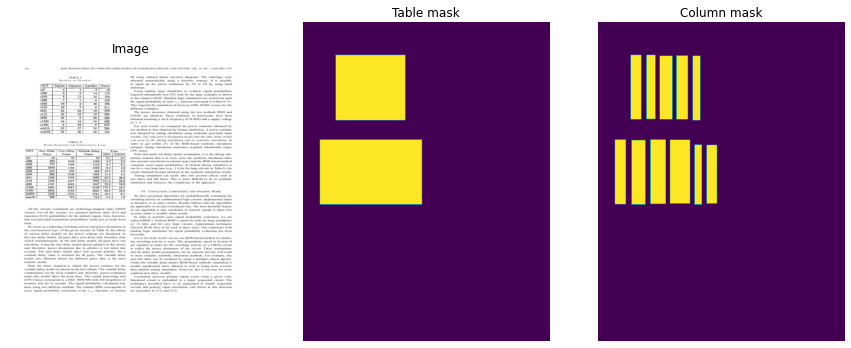

In [128]:
# showing marot image with its corresponding table mask and column mask
fig = plt.figure(figsize=(15, 15))
  

# reading images
Image1 = mpimg.imread('dataset/marmots_usuals/10.1.1.1.2129_6.jpeg')
Image2 = mpimg.imread('dataset/marmot_table/10.1.1.1.2129_6.bmp_table.jpeg')
Image3 = mpimg.imread('dataset/marmot_column/10.1.1.1.2129_6.bmp_col.jpeg')
  
#ploting marmot image
fig.add_subplot(1, 3, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title("Image")
  
#ploting table mask
fig.add_subplot(1, 3, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("Table mask")
  
#ploting column mask
fig.add_subplot(1, 3, 3)
plt.imshow(Image3)
plt.axis('off')
plt.title("Column mask")

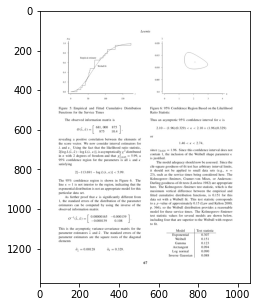

In [129]:
image = cv2.imread('dataset/Images/POD_0001.bmp',cv2.IMREAD_UNCHANGED)
plt.figure(figsize=(15,5))
plt.imshow(image)

In [130]:
#showing annotation of corresponding image
with open('dataset/Annotations/POD_0001.xml') as xml_file:
    xml_file = xml.dom.minidom.parseString(xml_file.read())
    xml_file = xml_file.toprettyxml()
print (xml_file)

<?xml version="1.0" ?>
<document filename="POD_0001.xml">
	
	
	<formulaRegion>
		
		
		<Coords points="186,577 414,577 186,619 414,619"/>
		
	
	</formulaRegion>
	
	
	<formulaRegion>
		
		
		<Coords points="176,805 423,805 176,823 423,823"/>
		
	
	</formulaRegion>
	
	
	<formulaRegion>
		
		
		<Coords points="143,1027 458,1027 143,1069 458,1069"/>
		
	
	</formulaRegion>
	
	
	<formulaRegion>
		
		
		<Coords points="179,1194 420,1194 179,1214 420,1214"/>
		
	
	</formulaRegion>
	
	
	<formulaRegion>
		
		
		<Coords points="585,582 935,582 585,599 935,599"/>
		
	
	</formulaRegion>
	
	
	<formulaRegion>
		
		
		<Coords points="701,659 820,659 701,675 820,675"/>
		
	
	</formulaRegion>
	
	
	<tableRegion>
		
		
		<Coords points="636,1098 884,1098 636,1245 884,1245"/>
		
	
	</tableRegion>
	
	
	<figureRegion>
		
		
		<Coords points="578,134 941,134 578,446 941,446"/>
		
	
	</figureRegion>
	
	
	<figureRegion>
		
		
		<Coords points="116,137 479,137 116,446 479,446"/>
		
	
	</figureRegion>
	

</docume

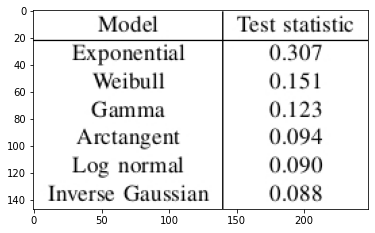

In [131]:
img=Image.open('dataset/Images/POD_0001.bmp')

x_min=636
y_min=1098
x_max=884
y_max=1245
crop = (x_min,y_min,x_max,y_max)
cropped_table = img.crop(crop)
cropped_table = plt.imshow(cropped_table)
plt.show()

In [132]:
##Getting size of images
dir_path = 'dataset/Images'
list_of_heights = []
list_of_widths = []
for file in os.listdir(dir_path):
  img = Image.open(dir_path + '/' + file)
  # get dimensions of image
  shape = img.size
  list_of_heights.append(shape[0])
  list_of_widths.append(shape[1]) 

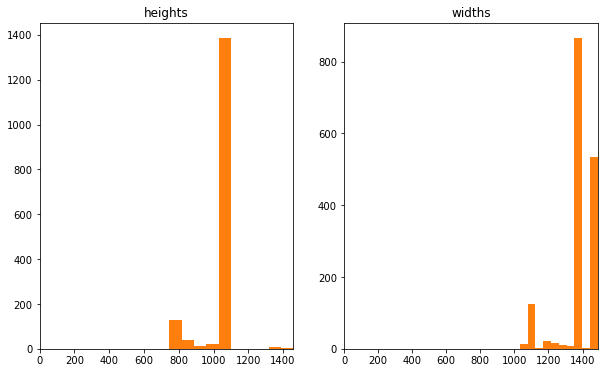

In [133]:
plt.figure(figsize=(10,6))
for i in range(2): 
  plt.subplot(1, 2, i+1)
  if i == 0:
    plt.hist(list_of_heights,bins=20)
    plt.hist(list_of_heights)
    plt.title('heights')
    plt.xlim(0,max(list(set(list_of_heights))))
  else :
    plt.hist(list_of_widths,bins=20)
    plt.hist(list_of_widths)
    plt.title('widths')
    plt.xlim(0,max(list(set(list_of_widths))))

In [136]:
#storing all the cordinate of each file which capture the tabular format in dataframe
dir_path = 'dataset/Annotations'

xmin_ , ymin_ , xmax_ , ymax_ = list(), list(), list() , list()

filename_ , table_width_ ,  table_height_ = list(), list() , list()

for file in os.listdir(dir_path):
  if file.endswith('.xml'):
    name = file[:-4]+".bmp"
    tree = ET.parse('dataset/Annotations/' + file)
    root = tree.getroot()

    fname="dataset/Images/" + file[:-4]+".bmp"
    img=Image.open(fname)

    xmin , ymin , xmax , ymax = list(), list(), list() , list()
    filename , table_width , table_height = list(), list() , list()
    if(root.findall("tableRegion")):
      data=root.findall("tableRegion/Coords")
      for i in range(0,len(data)):
        point=data[i].get("points")
        filename.append(name)
        table_width.append(img.size[0])
        table_height.append(img.size[1])
        points=point.split(" ")
        points = [[int(num) for num in string.split(",")] for string in points]
        coordinate = []
        for values in points:
          for value in values:
            coordinate.append(value)

        xmin.append(coordinate[0])
        ymin.append(coordinate[1])
        xmax.append(coordinate[6])
        ymax.append(coordinate[7])

      for i in range(0,len(data)):
        filename_.append(filename[i])
        table_width_.append(table_width[i])
        table_height_.append(table_height[i])
        xmin_.append(xmin[i])
        ymin_.append(ymin[i])
        xmax_.append(xmax[i])
        ymax_.append(ymax[i])
    
    else:
      filename_.append(name)
      table_width_.append(img.size[0])
      table_height_.append(img.size[1])
      xmin_.append(0)
      ymin_.append(0)
      xmax_.append(0)
      ymax_.append(0)          

Dict = dict({'filename': filename_,'table_width': table_width_, 'table_height':table_height_,'xmin':xmin_,'ymin':ymin_,'xmax':xmax_,'ymax':ymax_})


df=pd.DataFrame.from_dict(Dict)
df.to_pickle('df_ICDAR.pkl')

In [137]:
df.head(5)

,filename,table_width,table_height,xmin,ymin,xmax,ymax
0,POD_0000.bmp,1031,1459,0,0,0,0
1,POD_0001.bmp,1061,1373,636,1098,884,1245
2,POD_0002.bmp,749,1123,0,0,0,0
3,POD_0003.bmp,1061,1373,167,308,893,461
4,POD_0003.bmp,1061,1373,274,722,786,992


In [139]:
#creating table mask from ICDAR dataframe
for m in df['filename'].unique():
    width=int(df[df['filename']==m]['table_width'].unique())
    height=int(df[df['filename']==m]['table_height'].unique())
    
    xmin=df[df['filename']==m]['xmin'].to_list()
    ymin=df[df['filename']==m]['ymin'].to_list()
    xmax=df[df['filename']==m]['xmax'].to_list()
    ymax=df[df['filename']==m]['ymax'].to_list()

    table_mask = np.zeros((height, width), dtype=np.int32)

    for i in range(len(xmin)):
      table_xmin=xmin[i]
      table_ymin=ymin[i]
      table_xmax=xmax[i]
      table_ymax=ymax[i]
    

      table_mask[table_ymin:table_ymax, table_xmin:table_xmax] = 255 

    im_table = Image.fromarray(table_mask.astype(np.uint8),'L')
    im_table.save('dataset/ICDAR_table/' +m+"_table" + ".jpeg")  

Text(0.5, 1.0, 'Table mask')

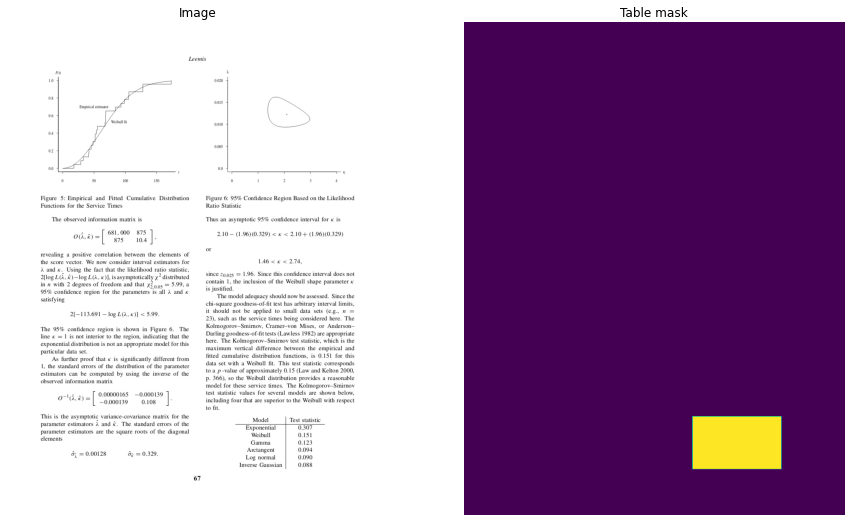

In [141]:
# showing marot image with its corresponding table mask and column mask
fig = plt.figure(figsize=(15, 10))
  

# reading images
Image1 = mpimg.imread('dataset/Images/POD_0001.bmp')
Image2 = mpimg.imread('dataset/ICDAR_table/POD_0001.bmp_table.jpeg')
  
#ploting marmot image
fig.add_subplot(1, 2, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title("Image")
  
#ploting table mask
fig.add_subplot(1, 2, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("Table mask")